# Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import glob

# Lendo os Dados em SQL

Para baixar os dados em sua máquina, [`clique aqui`](https://drive.google.com/drive/folders/1ZVQ437oHRKdkSwbjTDTy3MD8CguomRag?usp=sharing)

In [2]:
def convert_csv_to_sql(path_to_data, db_name, chunksize):
    db = sqlite3.connect(db_name)
    files = glob.glob(f'{path_to_data}/*.CSV')
    for file in files:
        table_name = file.split('/')[-1].split('.CSV')[0]
        df_chunks = pd.read_csv(file, sep='|', encoding='latin1', chunksize=chunksize)
        for df in df_chunks:
            df.to_sql(
                name=table_name,
                index=False,
                if_exists='append',
                con=db
            )

In [3]:
convert_csv_to_sql(r'./dados', 'desafio_1.db', chunksize=100000)

/var/folders/zm/3bssg1p14lj63wq1qny6y2qh0000gn/T/ipykernel_1441/878864411.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in df_chunks:
/var/folders/zm/3bssg1p14lj63wq1qny6y2qh0000gn/T/ipykernel_1441/878864411.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in df_chunks:
/var/folders/zm/3bssg1p14lj63wq1qny6y2qh0000gn/T/ipykernel_1441/878864411.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in df_chunks:
/var/folders/zm/3bssg1p14lj63wq1qny6y2qh0000gn/T/ipykernel_1441/878864411.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in df_chunks:
/var/folders/zm/3bssg1p14lj63wq1qny6y2qh0000gn/T/ipykernel_1441/878864411.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  f

In [4]:
db = sqlite3.connect('desafio_1.db')

# EDA

## Existem quantos alunos matriculados em cursos de Ensino Superior no Brasil?

In [5]:
query = '''
SELECT COUNT(ID_ALUNO) as ALUNOS
FROM DM_ALUNO
WHERE TP_SITUACAO = 2
'''

alunos_total = pd.read_sql_query(query, db)
alunos_total

,ALUNOS
0,7186970


In [6]:
alunos_cursando = alunos_total.values[0][0]
print(f'Existem {alunos_cursando} cursando algum curso de Ensino Superior no Brasil')

Existem 7186970 cursando algum curso de Ensino Superior no Brasil


## São muitos alunos, eu sei, mas quantas Instituições de Ensino Superior existem no Brasil?

In [7]:
query = '''
SELECT SG_IES as SIGLA_UNIVERSIDADE, CO_IES as CODIGO_UNIVERSIDADE, TP_CATEGORIA_ADMINISTRATIVA as CATEGORIA, CO_UF as CODIGO_ESTADO
FROM DM_IES
WHERE TP_ORGANIZACAO_ACADEMICA = 1
'''

df_ies = pd.read_sql_query(query, db)
df_ies

,SIGLA_UNIVERSIDADE,CODIGO_UNIVERSIDADE,CATEGORIA,CODIGO_ESTADO
0,UFMT,1,1,51
1,UNB,2,1,53
2,UFS,3,1,28
3,UFAM,4,1,13
4,UFOP,6,1,31
...,...,...,...,...
194,UNIDERP,671,4,50
195,UNILAB,15497,1,23
196,None,319,5,35
197,UNESP,56,2,35


In [8]:
ies_total = len(df_ies)
print(f'Para comportar todos esses estudantes, no Brasil existem {ies_total} Instituições de Ensino Superior (IES), o que dá uma média de {round(alunos_cursando/ies_total,0)} alunos por IES')

Para comportar todos esses estudantes, no Brasil existem 199 Instituições de Ensino Superior (IES), o que dá uma média de 36115.0 alunos por IES


De todas essas universidades, qual a maior (em quantidade de alunos)? E quantos alunos ela tem?

In [9]:
query_join = '''
            SELECT ALUNOS.ID_ALUNO as ID,
            IES.SG_IES as SIGLA_UNIVERSIDADE
            FROM DM_ALUNO as ALUNOS
            LEFT JOIN
                DM_IES as IES
                ON ALUNOS.CO_IES = IES.CO_IES
            WHERE ALUNOS.TP_SITUACAO = 2
'''

df_alunos = pd.read_sql_query(query_join,db)
df_alunos

,ID,SIGLA_UNIVERSIDADE
0,2ECD7C9BEA7DCEBC31B9F2874D454F71,UFMT
1,3EA3DF175677D93C4FDD47865E89B92A,UFMT
2,EF1C01E9B84BEB8D6AA9702F59A90410,UFMT
3,E92DBC6D54AD8AC7419AC6818C9D4C3B,UFMT
4,442253EDCC14C59DA844B46DE6BFC49C,UFMT
...,...,...
7186965,AFB1C88C61C115085A2A1D72AC83473D,None
7186966,9DA6C77C61E8CECE5952F79D6EE59072,None
7186967,050A076096291E60A0A57FF97A4D1C43,None
7186968,E82460DEB7C48ECA4022E2F18EB11361,None


In [10]:
df_alunos_universidade = pd.DataFrame(df_alunos['SIGLA_UNIVERSIDADE'].value_counts())
df_alunos_universidade['UNIVERSIDADE'] = df_alunos_universidade.index
df_alunos_universidade.reset_index(inplace=True, drop=True)
df_alunos_universidade.columns= ['COUNT', 'UNIVERSIDADE']
df_alunos_universidade

,COUNT,UNIVERSIDADE
0,381084,UNIP
1,201096,UNESA
2,187211,UNIASSELVI
3,157341,UNINTER
4,136879,UNIDERP
...,...,...
1771,2,FACINN
1772,2,FACSPEI
1773,1,SEF
1774,1,TATUÍ - FSP


In [11]:
max_alunos = df_alunos_universidade['COUNT'].max()
maior_universidade = df_alunos_universidade.loc[df_alunos_universidade['COUNT'] == df_alunos_universidade['COUNT'].max()][['UNIVERSIDADE']].values[0][0]

print(f'A universidade que tem mais alunos é a {maior_universidade} e ela possui {max_alunos} alunos!')

A universidade que tem mais alunos é a UNIP e ela possui 381084 alunos!


As maiores universidades do Brasil, em numero de alunos, são:

<AxesSubplot:title={'center':'Alunos por Universidade'}, xlabel='UNIVERSIDADE', ylabel='COUNT'>

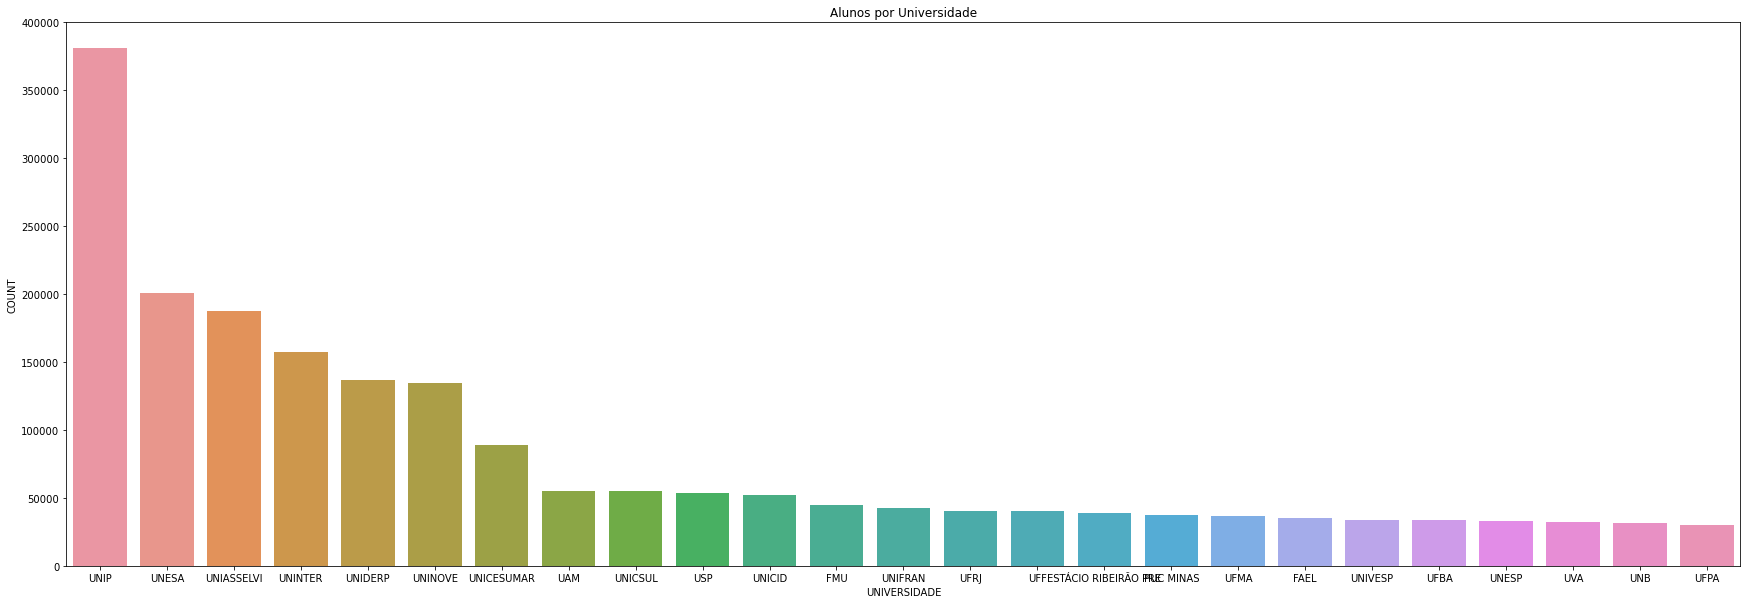

In [12]:
plt.figure(figsize=(30,10))
plt.title('Alunos por Universidade')
sns.barplot(data=df_alunos_universidade[:25], x='UNIVERSIDADE', y='COUNT')

## Um fator importante é que, no Brasil, existem Universidades Publicas e Privadas. Como é essa distribuição?

In [13]:
def get_tipo(categoria):
    if categoria <= 3:
        return 'PUBLICA'
    else:
        return 'PRIVADA'

In [14]:
df_ies['TIPO'] = df_ies['CATEGORIA'].map(lambda x: get_tipo(x))
df_ies

,SIGLA_UNIVERSIDADE,CODIGO_UNIVERSIDADE,CATEGORIA,CODIGO_ESTADO,TIPO
0,UFMT,1,1,51,PUBLICA
1,UNB,2,1,53,PUBLICA
2,UFS,3,1,28,PUBLICA
3,UFAM,4,1,13,PUBLICA
4,UFOP,6,1,31,PUBLICA
...,...,...,...,...,...
194,UNIDERP,671,4,50,PRIVADA
195,UNILAB,15497,1,23,PUBLICA
196,None,319,5,35,PRIVADA
197,UNESP,56,2,35,PUBLICA


In [15]:
df_ies.value_counts('TIPO')

publicas = df_ies.value_counts('TIPO')[0]
privadas = df_ies.value_counts('TIPO')[1]

print(f'Existem {publicas} Universidades Publicas e  {privadas} Universidades Privadas')

Existem 107 Universidades Publicas e  92 Universidades Privadas


<AxesSubplot:xlabel='TIPO', ylabel='Count'>

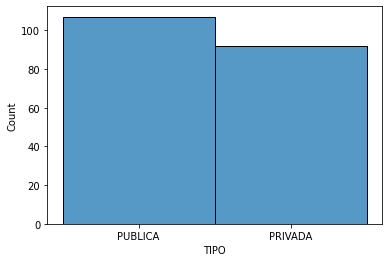

In [16]:
sns.histplot(data=df_ies, x='TIPO')

## No entanto, sabemos que no Brasil há uma discrepância entre os Estados. Existem Estados mais desenvolvidos (mais ricos) e Estados menos desenvolvidos (mais pobres). Será que as faculdades também refletem essa diferença?

In [17]:
df_estados = pd.read_excel(r'./anexos/Tabela Estados IBGE.xlsx')
df_estados

,Código da UF,UF,Estado
0,12,AC,Acre
1,27,AL,Alagoas
2,13,AM,Amazonas
3,16,AP,Amapá
4,29,BA,Bahia
5,23,CE,Ceará
6,53,DF,Distrito Federal
7,32,ES,Espírito Santo
8,52,GO,Goiás
9,21,MA,Maranhão


In [18]:
df_ies = df_ies.merge(df_estados, how = 'left', left_on='CODIGO_ESTADO', right_on='Código da UF')
df_ies.drop(['CODIGO_ESTADO', 'Estado', 'Código da UF'], inplace=True, axis=1)
df_ies

,SIGLA_UNIVERSIDADE,CODIGO_UNIVERSIDADE,CATEGORIA,TIPO,UF
0,UFMT,1,1,PUBLICA,MT
1,UNB,2,1,PUBLICA,DF
2,UFS,3,1,PUBLICA,SE
3,UFAM,4,1,PUBLICA,AM
4,UFOP,6,1,PUBLICA,MG
...,...,...,...,...,...
194,UNIDERP,671,4,PRIVADA,MS
195,UNILAB,15497,1,PUBLICA,CE
196,None,319,5,PRIVADA,SP
197,UNESP,56,2,PUBLICA,SP


<AxesSubplot:title={'center':'Contagem de Tipo de Universidade por UF'}, xlabel='UF', ylabel='Count'>

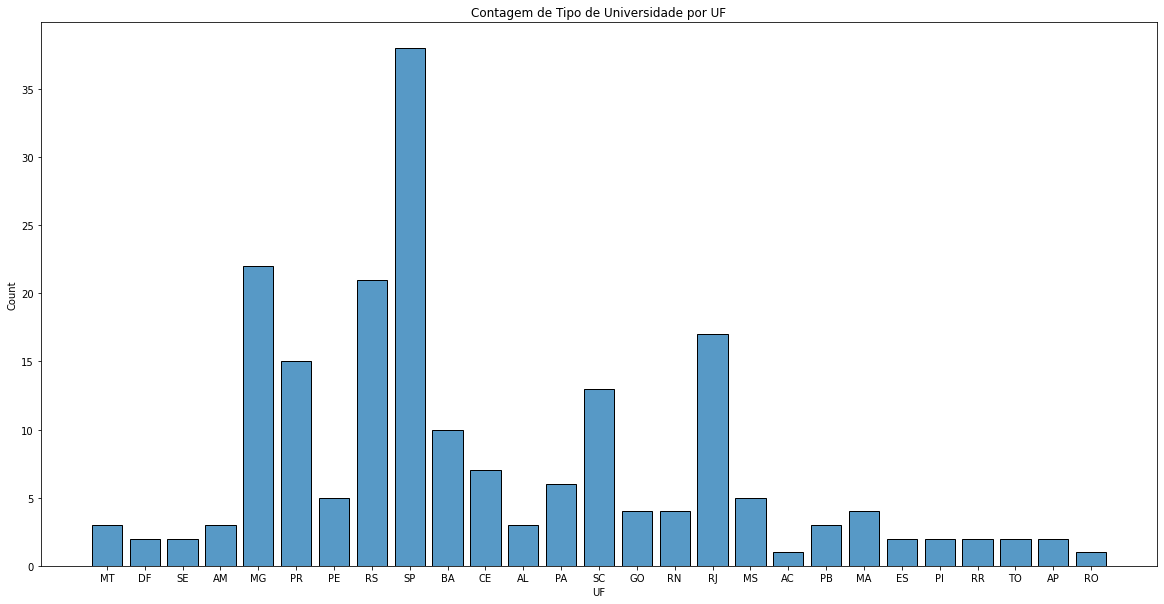

In [19]:
plt.figure(figsize=(20,10))
plt.title('Contagem de Tipo de Universidade por UF')
sns.histplot(data=df_ies, x='UF', multiple='dodge', shrink=.8)

Pela análise do Gráfico, fica muito claro que há uma concentração de Universidades na região Sul e Sudeste do Brasil.

### Será que se analisarmos separadamente entre Universidades Publicas e Privadas, conseguimos ver algum indicativo nessa diferença entre a Distribuicao de Universidades por estado?

<AxesSubplot:title={'center':'Contagem de Tipo de Universidade por UF'}, xlabel='UF', ylabel='Count'>

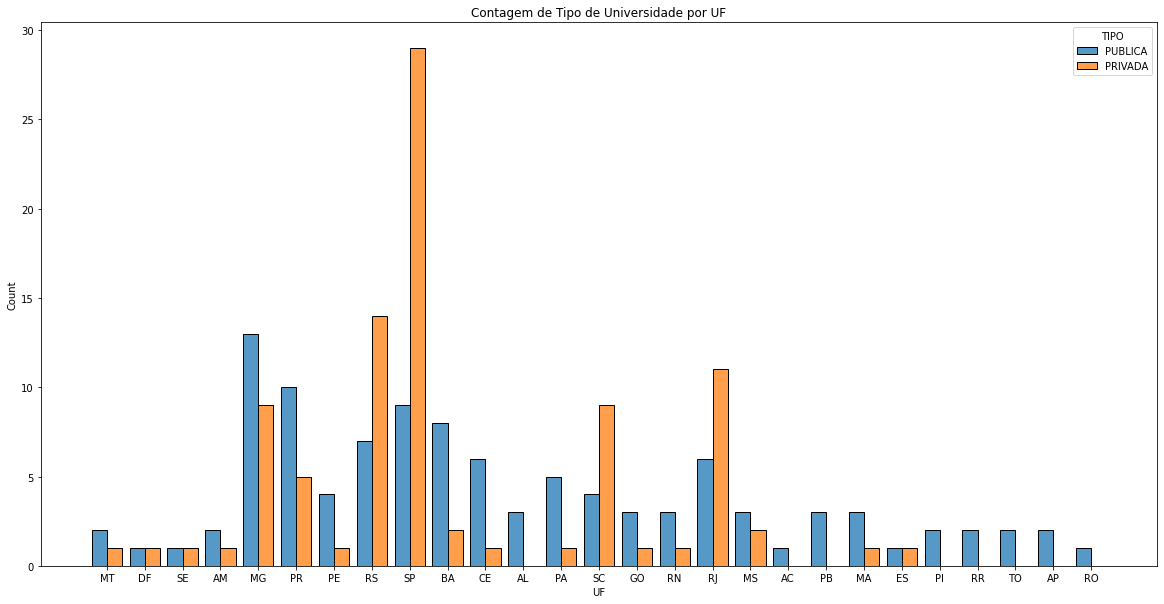

In [20]:
plt.figure(figsize=(20,10))
plt.title('Contagem de Tipo de Universidade por UF')
sns.histplot(data=df_ies, x='UF',hue='TIPO', multiple='dodge', shrink=.8)

Olhando pro gráfico, fica muito claro que em Universidades Privadas a discrepância entre os estados fica ainda maior :(

## Ainda no mérito de Regiões, existe uma crença de que alunos da região Norte do Brasil têm maior tendência a não concluírem os cursos quando comparados ao restante do país. Será que isso é verdade?

Fazendo um gráfico dos alunos que abandonaram o curso, temos:

In [21]:
query_norte = '''
            SELECT ALUNOS.ID_ALUNO as ID,
            ALUNOS.CO_UF_NASCIMENTO as CODIGO_UF_NASCIMENTO,
            IES.SG_IES as SIGLA_UNIVERSIDADE,
            IES.CO_REGIAO as CODIGO_REGIAO,
            IES.CO_UF AS CODIGO_ESTADO
            FROM DM_ALUNO as ALUNOS
            LEFT JOIN
                DM_IES as IES
                ON ALUNOS.CO_IES = IES.CO_IES
            WHERE ALUNOS.TP_SITUACAO = 3
            OR ALUNOS.TP_SITUACAO = 4
'''

df_norte = pd.read_sql_query(query_norte,db)
df_norte

,ID,CODIGO_UF_NASCIMENTO,SIGLA_UNIVERSIDADE,CODIGO_REGIAO,CODIGO_ESTADO
0,2A9470AC3FC03AD130954809A84BC7D4,NaN,UFMT,5,51
1,E535A93D94430667B67D180C506CCB66,NaN,UFMT,5,51
2,0617FBEA7F8A7FE095AC7A425DB9C365,NaN,UFMT,5,51
3,1F6DAC46F9DCE74E16573BAD76F51453,31.0,UFMT,5,51
4,9EA96DB4ADE57D8D61047AE38393D4B6,NaN,UFMT,5,51
...,...,...,...,...,...
3483613,D8A00793CD063E7112CEEC4926F5FBAB,35.0,None,3,35
3483614,4D1FAD6D6DAF94A259BDAFEF67125268,35.0,None,3,35
3483615,45D3FF258CBBE557ACF6FFA4562926BF,22.0,None,3,35
3483616,B505440B7452768EB4E9625EFCF0B09B,35.0,None,3,35


In [22]:
df_norte = df_norte.merge(df_estados, how='left', left_on='CODIGO_UF_NASCIMENTO', right_on='Código da UF')
df_norte.drop(['CODIGO_REGIAO', 'Código da UF', 'Estado'], inplace=True, axis=1)
df_norte.columns = ['ID', 'CODIGO_UF_NASCIMENTO', 'SIGLA_UNIVERSIDADE', 'CODIGO_ESTADO', 'UF_NASCIMENTO']
df_norte

,ID,CODIGO_UF_NASCIMENTO,SIGLA_UNIVERSIDADE,CODIGO_ESTADO,UF_NASCIMENTO
0,2A9470AC3FC03AD130954809A84BC7D4,NaN,UFMT,51,NaN
1,E535A93D94430667B67D180C506CCB66,NaN,UFMT,51,NaN
2,0617FBEA7F8A7FE095AC7A425DB9C365,NaN,UFMT,51,NaN
3,1F6DAC46F9DCE74E16573BAD76F51453,31.0,UFMT,51,MG
4,9EA96DB4ADE57D8D61047AE38393D4B6,NaN,UFMT,51,NaN
...,...,...,...,...,...
3483613,D8A00793CD063E7112CEEC4926F5FBAB,35.0,None,35,SP
3483614,4D1FAD6D6DAF94A259BDAFEF67125268,35.0,None,35,SP
3483615,45D3FF258CBBE557ACF6FFA4562926BF,22.0,None,35,PI
3483616,B505440B7452768EB4E9625EFCF0B09B,35.0,None,35,SP


In [23]:
df_norte = df_norte.merge(df_estados, how='left', left_on='CODIGO_ESTADO', right_on='Código da UF')
df_norte.drop(['CODIGO_UF_NASCIMENTO', 'CODIGO_ESTADO','Código da UF', 'Estado'], inplace=True, axis=1)
df_norte.columns = ['ID', 'SIGLA_UNIVERSIDADE', 'UF_NASCIMENTO', 'UF_UNIVERSIDADE']
df_norte

,ID,SIGLA_UNIVERSIDADE,UF_NASCIMENTO,UF_UNIVERSIDADE
0,2A9470AC3FC03AD130954809A84BC7D4,UFMT,NaN,MT
1,E535A93D94430667B67D180C506CCB66,UFMT,NaN,MT
2,0617FBEA7F8A7FE095AC7A425DB9C365,UFMT,NaN,MT
3,1F6DAC46F9DCE74E16573BAD76F51453,UFMT,MG,MT
4,9EA96DB4ADE57D8D61047AE38393D4B6,UFMT,NaN,MT
...,...,...,...,...
3483613,D8A00793CD063E7112CEEC4926F5FBAB,None,SP,SP
3483614,4D1FAD6D6DAF94A259BDAFEF67125268,None,SP,SP
3483615,45D3FF258CBBE557ACF6FFA4562926BF,None,PI,SP
3483616,B505440B7452768EB4E9625EFCF0B09B,None,SP,SP


In [24]:
def get_norte(UF):
    if (UF == 'AM' or UF == 'PA' or UF == 'RR' or UF == 'AP' or UF == 'AC' or UF == 'RO' or UF == 'TO'):
        return 'Norte'
    else:
        return 'Outra'

In [25]:
df_norte['REGIAO_NASCIMENTO'] = df_norte['UF_NASCIMENTO'].map(lambda x: get_norte(x))
df_norte['REGIAO_UNIVERSIDADE'] = df_norte['UF_UNIVERSIDADE'].map(lambda x: get_norte(x))
df_norte

,ID,SIGLA_UNIVERSIDADE,UF_NASCIMENTO,UF_UNIVERSIDADE,REGIAO_NASCIMENTO,REGIAO_UNIVERSIDADE
0,2A9470AC3FC03AD130954809A84BC7D4,UFMT,NaN,MT,Outra,Outra
1,E535A93D94430667B67D180C506CCB66,UFMT,NaN,MT,Outra,Outra
2,0617FBEA7F8A7FE095AC7A425DB9C365,UFMT,NaN,MT,Outra,Outra
3,1F6DAC46F9DCE74E16573BAD76F51453,UFMT,MG,MT,Outra,Outra
4,9EA96DB4ADE57D8D61047AE38393D4B6,UFMT,NaN,MT,Outra,Outra
...,...,...,...,...,...,...
3483613,D8A00793CD063E7112CEEC4926F5FBAB,None,SP,SP,Outra,Outra
3483614,4D1FAD6D6DAF94A259BDAFEF67125268,None,SP,SP,Outra,Outra
3483615,45D3FF258CBBE557ACF6FFA4562926BF,None,PI,SP,Outra,Outra
3483616,B505440B7452768EB4E9625EFCF0B09B,None,SP,SP,Outra,Outra


<AxesSubplot:xlabel='REGIAO_NASCIMENTO', ylabel='Count'>

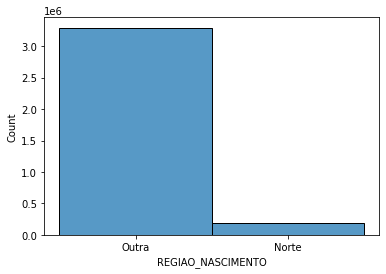

In [26]:
sns.histplot(data=df_norte, x='REGIAO_NASCIMENTO')

Olhando pro gráfico, podemos ver que existem menos alunos abandonando na Região Norte do que no resto do país. Porém somente essa informação crua não nos traz muita informações.

Para tirar conclusoes mais assertivas, vamos calcular o percentual de abandono, mas o que é isso? Para cada 100 alunos cursando algum curso de Ensino Superior, quantos abandonam? Esse é o nosso percentual de abandono.

Pra isso, quantos alunos que são do Norte (e que não são) estão cursando Ensino Superior?

In [27]:
query_norte_cursando = '''
            SELECT ALUNOS.ID_ALUNO as ID,
            ALUNOS.CO_UF_NASCIMENTO as CODIGO_UF_NASCIMENTO,
            IES.SG_IES as SIGLA_UNIVERSIDADE,
            IES.CO_REGIAO as CODIGO_REGIAO,
            IES.CO_UF AS CODIGO_ESTADO
            FROM DM_ALUNO as ALUNOS
            LEFT JOIN
                DM_IES as IES
                ON ALUNOS.CO_IES = IES.CO_IES
            WHERE ALUNOS.TP_SITUACAO = 2
'''

df_norte_cursando = pd.read_sql_query(query_norte_cursando,db)
df_norte_cursando

,ID,CODIGO_UF_NASCIMENTO,SIGLA_UNIVERSIDADE,CODIGO_REGIAO,CODIGO_ESTADO
0,2ECD7C9BEA7DCEBC31B9F2874D454F71,NaN,UFMT,5,51
1,3EA3DF175677D93C4FDD47865E89B92A,NaN,UFMT,5,51
2,EF1C01E9B84BEB8D6AA9702F59A90410,NaN,UFMT,5,51
3,E92DBC6D54AD8AC7419AC6818C9D4C3B,NaN,UFMT,5,51
4,442253EDCC14C59DA844B46DE6BFC49C,NaN,UFMT,5,51
...,...,...,...,...,...
7186965,AFB1C88C61C115085A2A1D72AC83473D,35.0,None,3,35
7186966,9DA6C77C61E8CECE5952F79D6EE59072,35.0,None,3,35
7186967,050A076096291E60A0A57FF97A4D1C43,35.0,None,3,35
7186968,E82460DEB7C48ECA4022E2F18EB11361,35.0,None,3,35


In [28]:
df_norte_cursando = df_norte_cursando.merge(df_estados, how='left', left_on='CODIGO_UF_NASCIMENTO', right_on='Código da UF')
df_norte_cursando.drop(['CODIGO_REGIAO', 'Código da UF', 'Estado'], inplace=True, axis=1)
df_norte_cursando.columns = ['ID', 'CODIGO_UF_NASCIMENTO', 'SIGLA_UNIVERSIDADE', 'CODIGO_ESTADO', 'UF_NASCIMENTO']
df_norte_cursando

,ID,CODIGO_UF_NASCIMENTO,SIGLA_UNIVERSIDADE,CODIGO_ESTADO,UF_NASCIMENTO
0,2ECD7C9BEA7DCEBC31B9F2874D454F71,NaN,UFMT,51,NaN
1,3EA3DF175677D93C4FDD47865E89B92A,NaN,UFMT,51,NaN
2,EF1C01E9B84BEB8D6AA9702F59A90410,NaN,UFMT,51,NaN
3,E92DBC6D54AD8AC7419AC6818C9D4C3B,NaN,UFMT,51,NaN
4,442253EDCC14C59DA844B46DE6BFC49C,NaN,UFMT,51,NaN
...,...,...,...,...,...
7186965,AFB1C88C61C115085A2A1D72AC83473D,35.0,None,35,SP
7186966,9DA6C77C61E8CECE5952F79D6EE59072,35.0,None,35,SP
7186967,050A076096291E60A0A57FF97A4D1C43,35.0,None,35,SP
7186968,E82460DEB7C48ECA4022E2F18EB11361,35.0,None,35,SP


In [29]:
df_norte_cursando = df_norte_cursando.merge(df_estados, how='left', left_on='CODIGO_ESTADO', right_on='Código da UF')
df_norte_cursando.drop(['CODIGO_UF_NASCIMENTO', 'CODIGO_ESTADO','Código da UF', 'Estado'], inplace=True, axis=1)
df_norte_cursando.columns = ['ID', 'SIGLA_UNIVERSIDADE', 'UF_NASCIMENTO', 'UF_UNIVERSIDADE']
df_norte_cursando

,ID,SIGLA_UNIVERSIDADE,UF_NASCIMENTO,UF_UNIVERSIDADE
0,2ECD7C9BEA7DCEBC31B9F2874D454F71,UFMT,NaN,MT
1,3EA3DF175677D93C4FDD47865E89B92A,UFMT,NaN,MT
2,EF1C01E9B84BEB8D6AA9702F59A90410,UFMT,NaN,MT
3,E92DBC6D54AD8AC7419AC6818C9D4C3B,UFMT,NaN,MT
4,442253EDCC14C59DA844B46DE6BFC49C,UFMT,NaN,MT
...,...,...,...,...
7186965,AFB1C88C61C115085A2A1D72AC83473D,None,SP,SP
7186966,9DA6C77C61E8CECE5952F79D6EE59072,None,SP,SP
7186967,050A076096291E60A0A57FF97A4D1C43,None,SP,SP
7186968,E82460DEB7C48ECA4022E2F18EB11361,None,SP,SP


In [30]:
df_norte_cursando['REGIAO_NASCIMENTO'] = df_norte_cursando['UF_NASCIMENTO'].map(lambda x: get_norte(x))
df_norte_cursando['REGIAO_UNIVERSIDADE'] = df_norte_cursando['UF_UNIVERSIDADE'].map(lambda x: get_norte(x))
df_norte_cursando

,ID,SIGLA_UNIVERSIDADE,UF_NASCIMENTO,UF_UNIVERSIDADE,REGIAO_NASCIMENTO,REGIAO_UNIVERSIDADE
0,2ECD7C9BEA7DCEBC31B9F2874D454F71,UFMT,NaN,MT,Outra,Outra
1,3EA3DF175677D93C4FDD47865E89B92A,UFMT,NaN,MT,Outra,Outra
2,EF1C01E9B84BEB8D6AA9702F59A90410,UFMT,NaN,MT,Outra,Outra
3,E92DBC6D54AD8AC7419AC6818C9D4C3B,UFMT,NaN,MT,Outra,Outra
4,442253EDCC14C59DA844B46DE6BFC49C,UFMT,NaN,MT,Outra,Outra
...,...,...,...,...,...,...
7186965,AFB1C88C61C115085A2A1D72AC83473D,None,SP,SP,Outra,Outra
7186966,9DA6C77C61E8CECE5952F79D6EE59072,None,SP,SP,Outra,Outra
7186967,050A076096291E60A0A57FF97A4D1C43,None,SP,SP,Outra,Outra
7186968,E82460DEB7C48ECA4022E2F18EB11361,None,SP,SP,Outra,Outra


<AxesSubplot:xlabel='REGIAO_NASCIMENTO', ylabel='Count'>

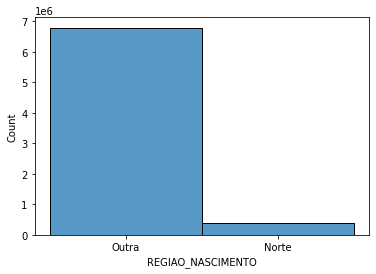

In [31]:
sns.histplot(data=df_norte_cursando, x='REGIAO_NASCIMENTO')

Agora basta calcular a taxa de abandono

In [32]:
df_norte_abandonos = pd.DataFrame(df_norte['REGIAO_NASCIMENTO'].value_counts())
df_norte_abandonos['REGIAO'] = df_norte_abandonos.index
df_norte_abandonos.reset_index(inplace=True, drop=True)
df_norte_abandonos.columns = ['COUNT', 'REGIAO_NASCIMENTO']
df_norte_abandonos

,COUNT,REGIAO_NASCIMENTO
0,3292157,Outra
1,191461,Norte


In [33]:
df_norte_ativos = pd.DataFrame(df_norte_cursando['REGIAO_NASCIMENTO'].value_counts())
df_norte_ativos['REGIAO'] = df_norte_ativos.index
df_norte_ativos.reset_index(inplace=True, drop=True)
df_norte_ativos.columns = ['COUNT', 'REGIAO_NASCIMENTO']
df_norte_ativos

,COUNT,REGIAO_NASCIMENTO
0,6790875,Outra
1,396095,Norte


In [34]:
df_norte_abandonos = df_norte_abandonos.merge(df_norte_ativos, how = 'left', left_on='REGIAO_NASCIMENTO', right_on='REGIAO_NASCIMENTO')
df_norte_abandonos

,COUNT_x,REGIAO_NASCIMENTO,COUNT_y
0,3292157,Outra,6790875
1,191461,Norte,396095


In [35]:
df_norte_abandonos.columns = ['ABANDONOS', 'REGIAO_NASCIMENTO', 'ATIVOS']
df_norte_abandonos

,ABANDONOS,REGIAO_NASCIMENTO,ATIVOS
0,3292157,Outra,6790875
1,191461,Norte,396095


In [36]:
df_norte_abandonos['% ABANDONO'] = round(df_norte_abandonos['ABANDONOS']/df_norte_abandonos['ATIVOS']*100,2)
df_norte_abandonos

,ABANDONOS,REGIAO_NASCIMENTO,ATIVOS,% ABANDONO
0,3292157,Outra,6790875,48.48
1,191461,Norte,396095,48.34


In [37]:
abandono_restante = df_norte_abandonos.values[0][3]
abandono_norte = df_norte_abandonos.values[1][3]

print(f'A taxa de abandono na região norte é de {abandono_norte}%, enquanto a taxa de abandono no restante do pais é de {abandono_restante}%')
print(f'Ou seja, para cada 100 alunos cursando Ensino Superior na Região Norte, {int(abandono_norte)} abandonam o curso')

A taxa de abandono na região norte é de 48.34%, enquanto a taxa de abandono no restante do pais é de 48.48%
Ou seja, para cada 100 alunos cursando Ensino Superior na Região Norte, 48 abandonam o curso


Com isso, podemos afirmar que a crença de que os alunos da região norte tendem a abandonar mais os cursos é uma mentira!

## Ainda sobre crenças popular, existe um 'preconceito' de que cursos de Engenharia possuem mais alunos homens do que mulheres. Será mesmo?

In [38]:
query_join_engenharia = '''
            SELECT ALUNOS.ID_ALUNO as ID,
            ALUNOS.TP_SEXO as SEXO,
            CURSO.NO_CURSO as NOME_CURSO
            FROM DM_ALUNO as ALUNOS
            LEFT JOIN
                DM_CURSO as CURSO
                ON ALUNOS.CO_CURSO = CURSO.CO_CURSO
            WHERE
            NOME_CURSO like 'ENGENHARIA%'
            AND ALUNOS.TP_SITUACAO = 2
'''

df_engenharia = pd.read_sql_query(query_join_engenharia,db)
df_engenharia

,ID,SEXO,NOME_CURSO
0,159B6F3AB6FCA2BA614423C36D52760C,2,ENGENHARIA CIVIL
1,5A5CDFF52D339C57BFA37A390AB48B3C,2,ENGENHARIA CIVIL
2,3F4342E9D54A1E8AD9163C929C4FEE06,2,ENGENHARIA CIVIL
3,249519167D8C58A13DC4B1D95073503E,2,ENGENHARIA CIVIL
4,7175ACF66481B0070D01DC3A236A226D,2,ENGENHARIA CIVIL
...,...,...,...
851468,8B3BFED11D5775A9DBA67DEDECA43234,1,ENGENHARIA CIVIL
851469,316C1E98A173620F6AD77EFC85292ECD,2,ENGENHARIA CIVIL
851470,392C38071BACBEE8A604554D9409096F,2,ENGENHARIA CIVIL
851471,D12A57140E96DE5DE64F3D63A13C403E,2,ENGENHARIA CIVIL


In [39]:
def get_sexo(id):
    if id == 1:
        return 'F'
    else:
        return 'M'

In [40]:
df_engenharia['SEXO'] = df_engenharia['SEXO'].map(lambda x: get_sexo(x))
df_engenharia

,ID,SEXO,NOME_CURSO
0,159B6F3AB6FCA2BA614423C36D52760C,M,ENGENHARIA CIVIL
1,5A5CDFF52D339C57BFA37A390AB48B3C,M,ENGENHARIA CIVIL
2,3F4342E9D54A1E8AD9163C929C4FEE06,M,ENGENHARIA CIVIL
3,249519167D8C58A13DC4B1D95073503E,M,ENGENHARIA CIVIL
4,7175ACF66481B0070D01DC3A236A226D,M,ENGENHARIA CIVIL
...,...,...,...
851468,8B3BFED11D5775A9DBA67DEDECA43234,F,ENGENHARIA CIVIL
851469,316C1E98A173620F6AD77EFC85292ECD,M,ENGENHARIA CIVIL
851470,392C38071BACBEE8A604554D9409096F,M,ENGENHARIA CIVIL
851471,D12A57140E96DE5DE64F3D63A13C403E,M,ENGENHARIA CIVIL


In [41]:
df_alunos_engenharia = pd.DataFrame(df_engenharia['SEXO'].value_counts())
df_alunos_engenharia['Sex'] = df_alunos_engenharia.index
df_alunos_engenharia.reset_index(inplace=True, drop=True)
df_alunos_engenharia.columns= ['COUNT', 'SEXO']
df_alunos_engenharia

,COUNT,SEXO
0,620124,M
1,231349,F


<AxesSubplot:xlabel='SEXO', ylabel='COUNT'>

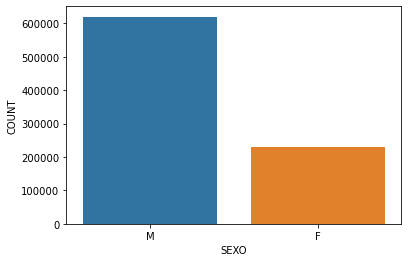

In [42]:
sns.barplot(data=df_alunos_engenharia, x='SEXO', y='COUNT')

In [43]:
homens = df_alunos_engenharia.loc[df_alunos_engenharia['SEXO'] == 'M'].values[0][0]
mulheres = df_alunos_engenharia.loc[df_alunos_engenharia['SEXO'] == 'F'].values[0][0]

print(f'Existem {homens} homens cursando engenharia e {mulheres} mulheres. Logo, o total de homens é {round(homens/mulheres*100,1)}% maior')

Existem 620124 homens cursando engenharia e 231349 mulheres. Logo, o total de homens é 268.0% maior


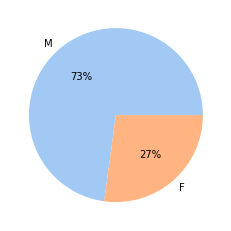

In [44]:
data = [homens, mulheres]
labels = ['M', 'F']

colors = sns.color_palette('pastel')[0:3]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Infelizmente essa crença é verdadeira :(

## Pra finalizar, sabemos que todos os anos novos cursos são abertos, como é essa distribuição ao longo dos anos? Qual curso mais antigo do Brasil? E o mais novo?

In [45]:
query_cursos_novos = '''
SELECT CO_CURSO as CODIGO_CURSO, 
NO_CURSO as NOME_CURSO, 
DT_INICIO_FUNCIONAMENTO as DATA_CURSO
FROM DM_CURSO
'''

df_curso = pd.read_sql_query(query_cursos_novos, db)
df_curso

,CODIGO_CURSO,NOME_CURSO,DATA_CURSO
0,1,DIREITO,05/09/1952
1,2,CIÊNCIAS ECONÔMICAS,11/10/1968
2,3,ENGENHARIA CIVIL,11/10/1968
3,6,PEDAGOGIA,15/09/1970
4,7,SERVIÇO SOCIAL,09/03/1970
...,...,...,...
38251,5001430,GESTÃO COMERCIAL,None
38252,1458085,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,01/08/2018
38253,1458087,GESTÃO DA PRODUÇÃO INDUSTRIAL,01/08/2018
38254,1465936,GESTÃO DE ENERGIA E EFICIÊNCIA ENERGÉTICA,None


In [46]:
def get_year(date):
    try:
        return date.split(r'/')[2]
    except:
        return None

In [47]:
df_curso['year'] = df_curso['DATA_CURSO'].map(lambda x: get_year(x))
df_curso

,CODIGO_CURSO,NOME_CURSO,DATA_CURSO,year
0,1,DIREITO,05/09/1952,1952
1,2,CIÊNCIAS ECONÔMICAS,11/10/1968,1968
2,3,ENGENHARIA CIVIL,11/10/1968,1968
3,6,PEDAGOGIA,15/09/1970,1970
4,7,SERVIÇO SOCIAL,09/03/1970,1970
...,...,...,...,...
38251,5001430,GESTÃO COMERCIAL,None,None
38252,1458085,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,01/08/2018,2018
38253,1458087,GESTÃO DA PRODUÇÃO INDUSTRIAL,01/08/2018,2018
38254,1465936,GESTÃO DE ENERGIA E EFICIÊNCIA ENERGÉTICA,None,None


In [48]:
df_ano = pd.DataFrame(df_curso['year'].value_counts())
df_ano['ano'] = df_ano.index
df_ano.columns = ['COUNT', 'YEAR']
df_ano.reset_index(inplace=True, drop=True)
df_ano['YEAR'] = pd.to_numeric(df_ano['YEAR'])
df_ano.sort_values('YEAR', ascending=True, inplace=True)
df_ano.drop(axis = 0, index = len(df_ano)-1, inplace=True)
df_ano

,COUNT,YEAR
108,2,1808
118,1,1811
104,2,1816
115,1,1820
111,2,1828
...,...,...
4,1831,2014
1,1975,2015
5,1827,2016
9,1458,2017


<AxesSubplot:xlabel='YEAR', ylabel='COUNT'>

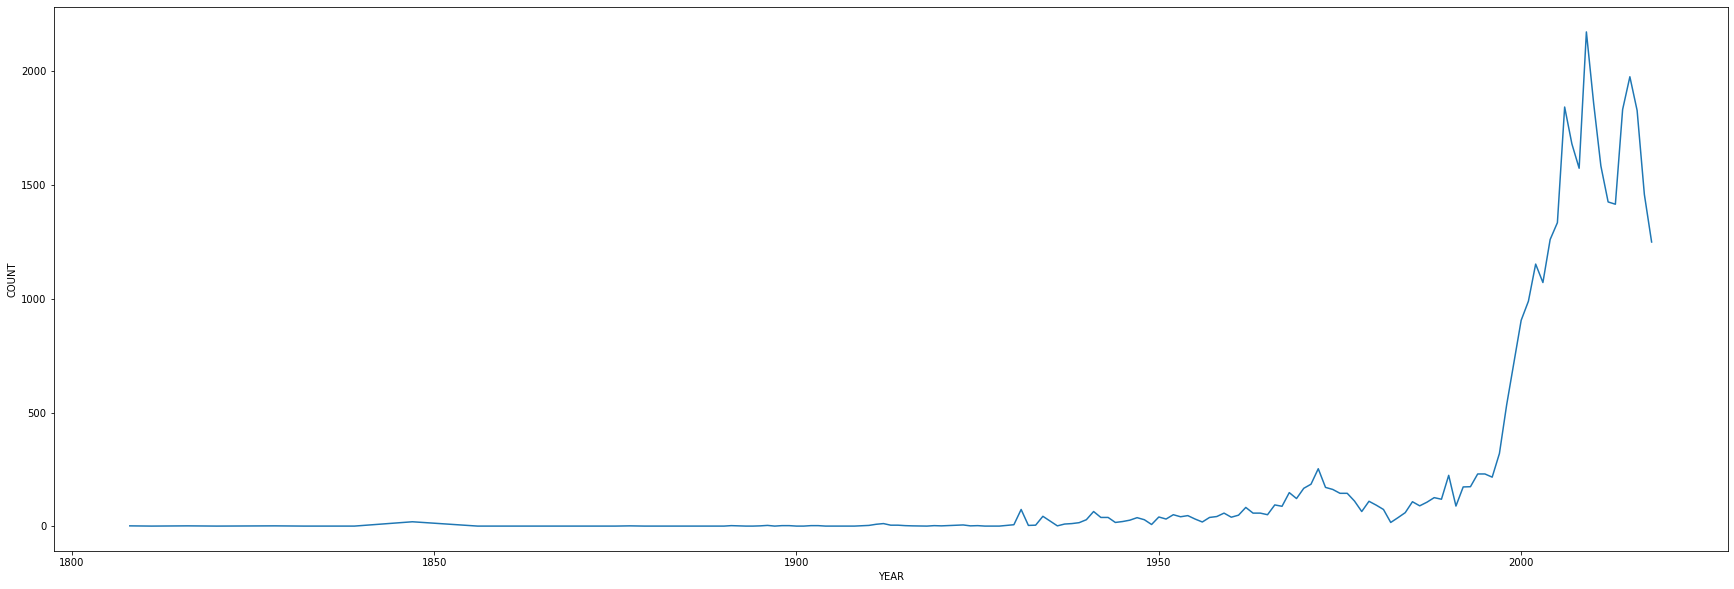

In [49]:
plt.figure(figsize=(30,10))
sns.lineplot(data = df_ano, x = 'YEAR', y='COUNT')

Podemos ver que o curso mais antigo do Brasil é de +/- 1800 e bolinhas. Que curso é esse?

In [50]:
curso_mais_antigo = df_curso.loc[df_curso['year'] == str(df_ano['YEAR'].min())].values[0][1]
ano = df_ano['YEAR'].min()

print(f'O curso mais antigo do Brasil é o curso de {curso_mais_antigo}, que começou a ser ofertado no ano de {ano}')

O curso mais antigo do Brasil é o curso de MEDICINA, que começou a ser ofertado no ano de 1808


In [51]:
curso_mais_novo = df_curso.loc[df_curso['year'] == str(df_ano['YEAR'].max())].values[0][1]
ano_novo = df_ano['YEAR'].max()

print(f'O curso mais novo do Brasil é o curso de {curso_mais_novo}, que começou a ser ofertado no ano de {ano_novo}')

O curso mais novo do Brasil é o curso de CINEMA E AUDIOVISUAL, que começou a ser ofertado no ano de 2018
